# Imports

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','no-latex', 'grid']) #ieee, grid

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

from funcs import *
from stats import *
from Fit import *

# Functions

In [28]:
def H_R(w,tau, a):
    return w*tau/np.sqrt(1+np.power(w*tau,2)) + a

def H_C(w,tau, a):
    return 1/np.sqrt(1+np.power(w*tau,2)) + a

def fase_R(w,tau, a, b):
    return np.pi/2 + b*np.arctan(w*tau) + a

def fase_C(w,tau, a, b):
    return b*np.arctan(w*tau) + a

# RC

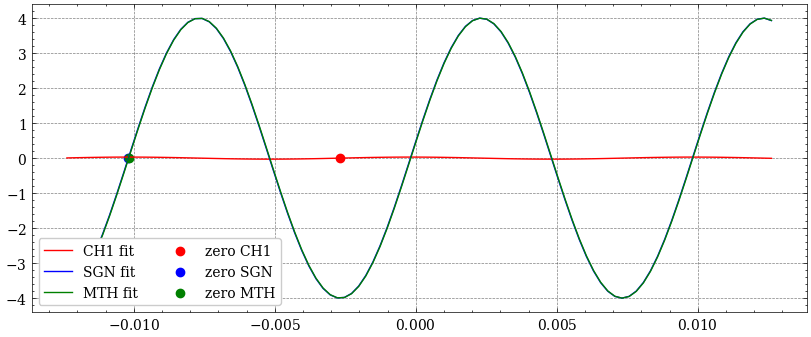

100 0.00751503999995537 1.1789999999929981e-05


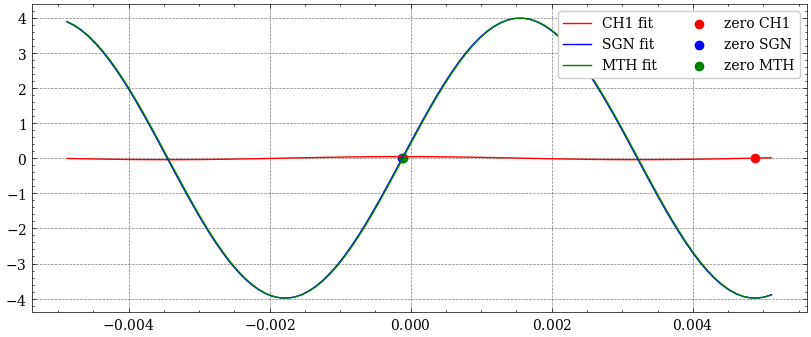

150 0.005006479999978943 1.1519999999994035e-05


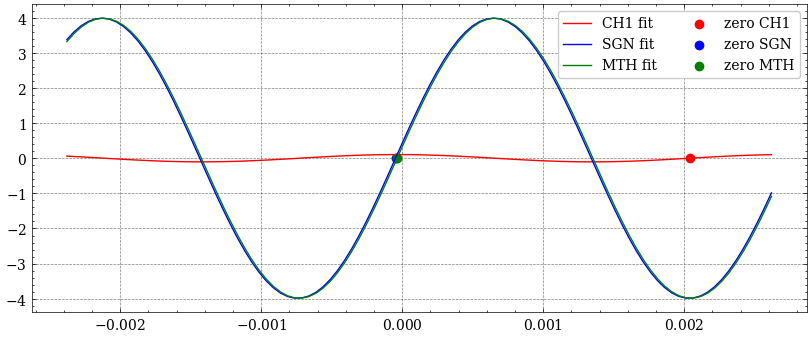

360 0.002087449999995872 1.1490000000001836e-05


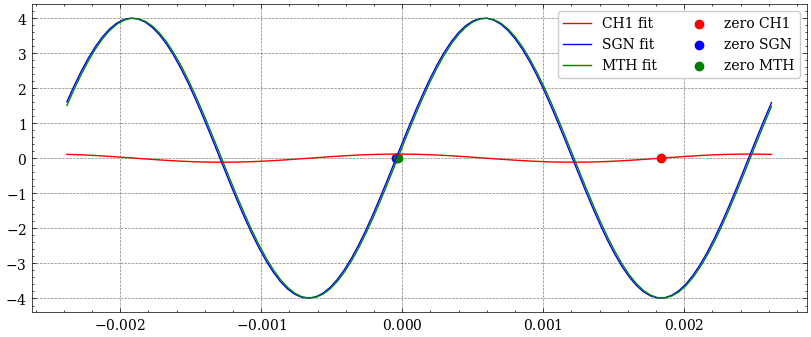

400 0.0018801299999970764 1.1540000000001844e-05


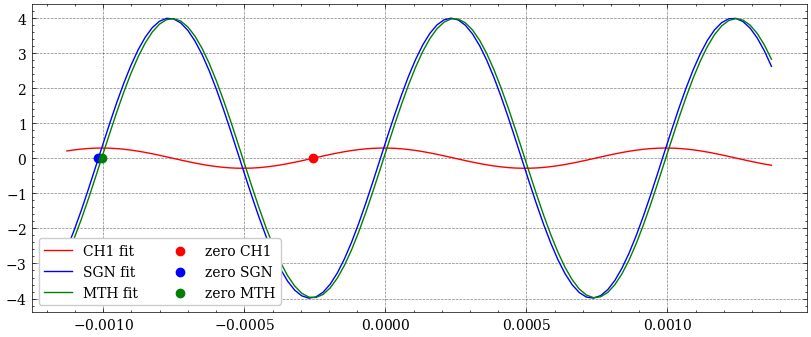

1000 0.0007621800000020319 1.1519999999931585e-05


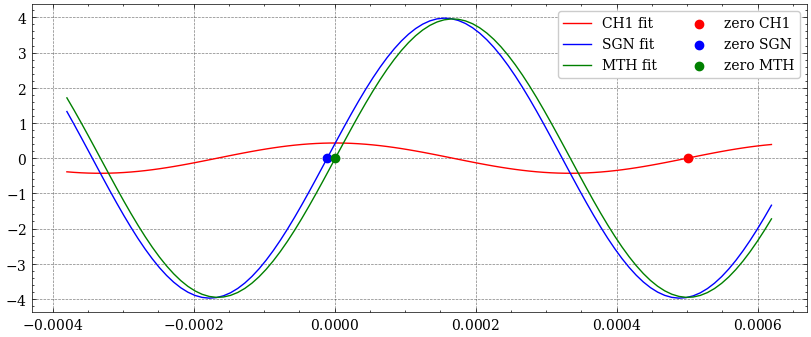

1500 0.0005109899999998462 1.148999999999991e-05


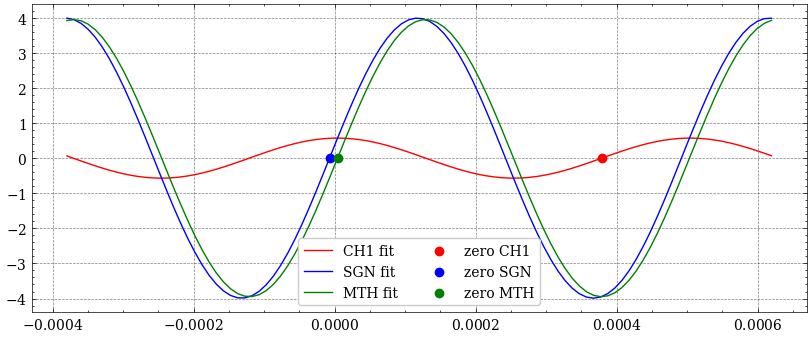

2000 0.00038623999999984245 1.1399999999999911e-05


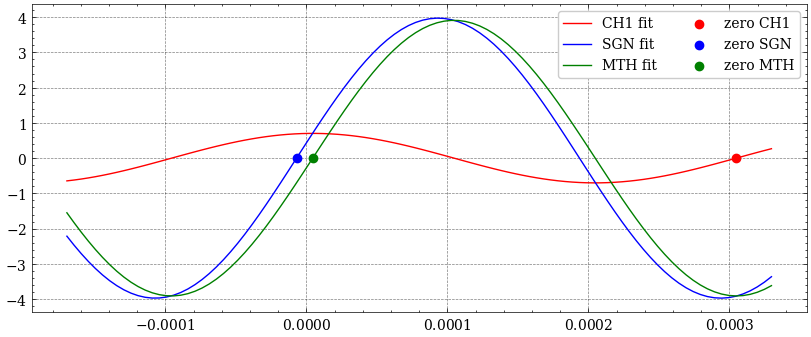

2500 0.00031184999999988086 1.145999999999991e-05


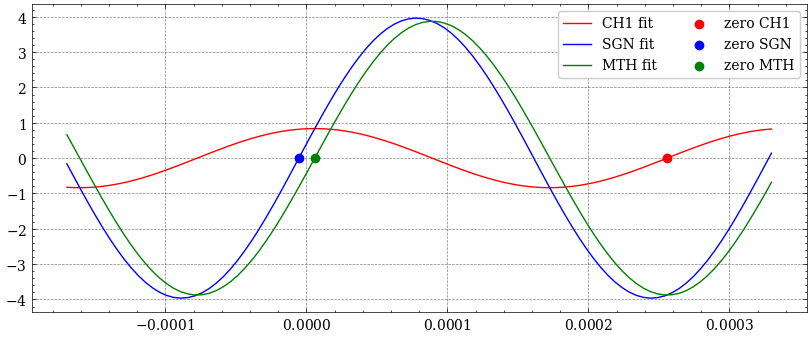

3000 0.0002611299999999063 1.1269999999999912e-05


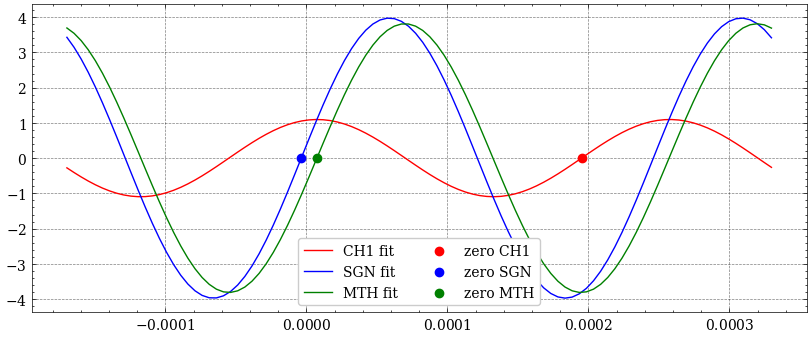

4000 0.0001987699999999377 1.1099999999999914e-05


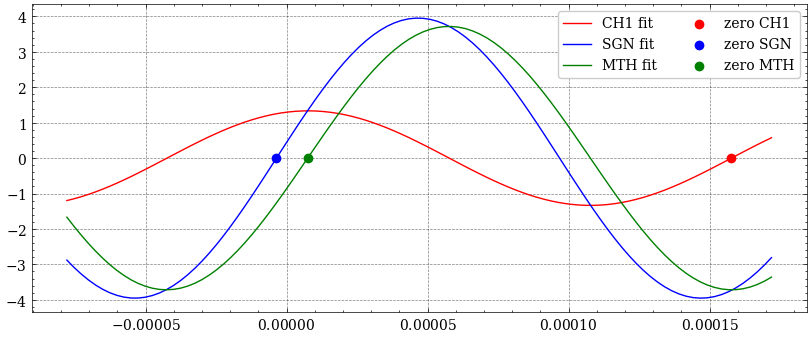

5000 0.0001613099999999571 1.1059999999999914e-05


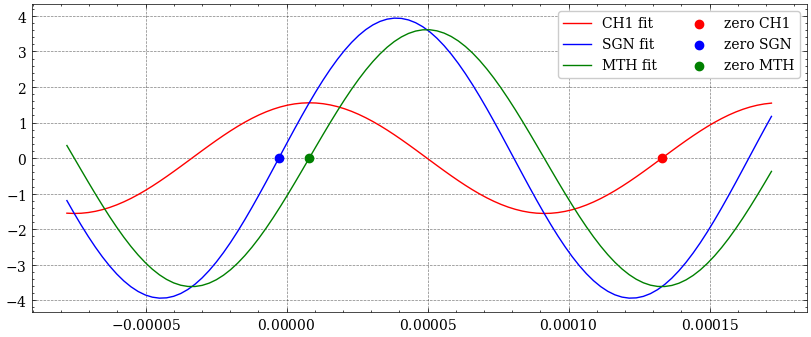

6000 0.00013583999999996986 1.0769999999999917e-05


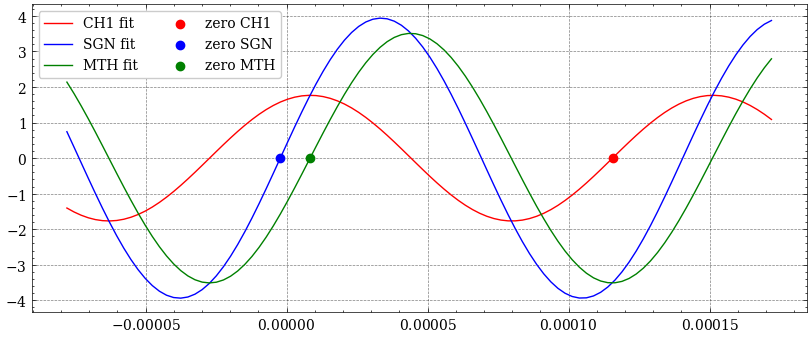

7000 0.00011778999999997895 1.055999999999992e-05


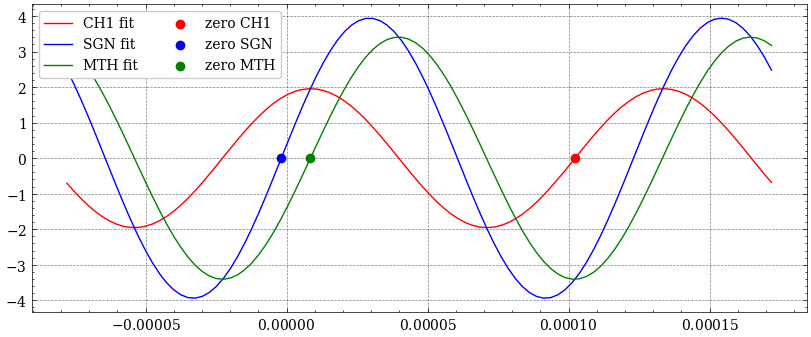

8000 0.00010415999999998583 1.0339999999999921e-05


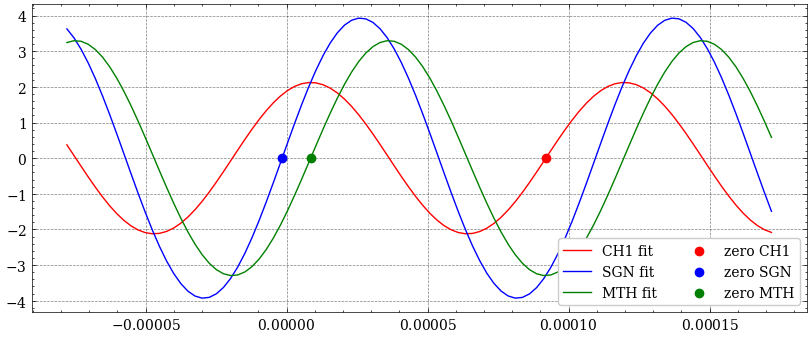

9000 9.350999999999118e-05 1.0109999999999924e-05


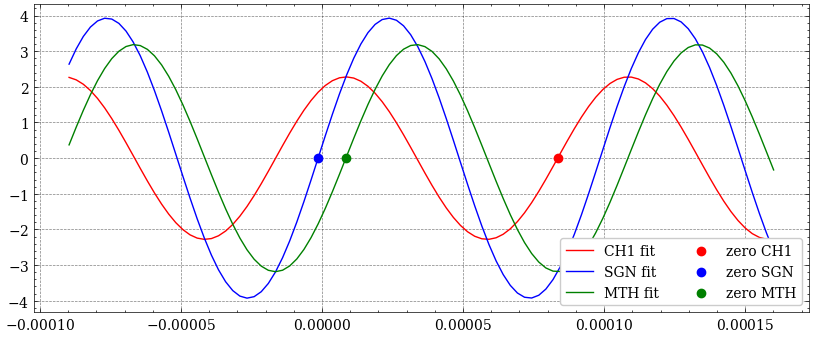

10000 8.494999999999553e-05 9.849999999999926e-06


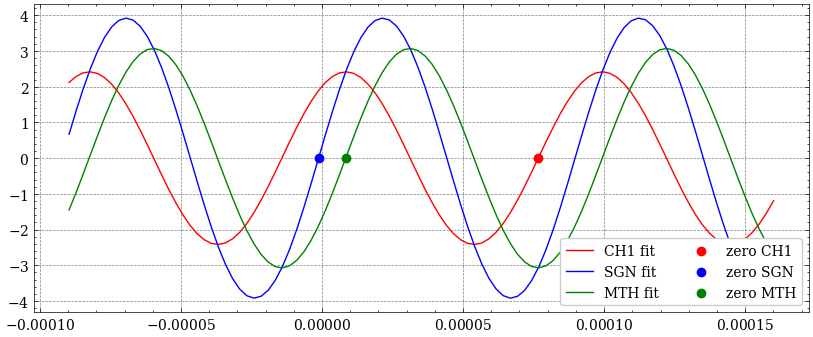

11000 7.78899999999991e-05 9.609999999999928e-06


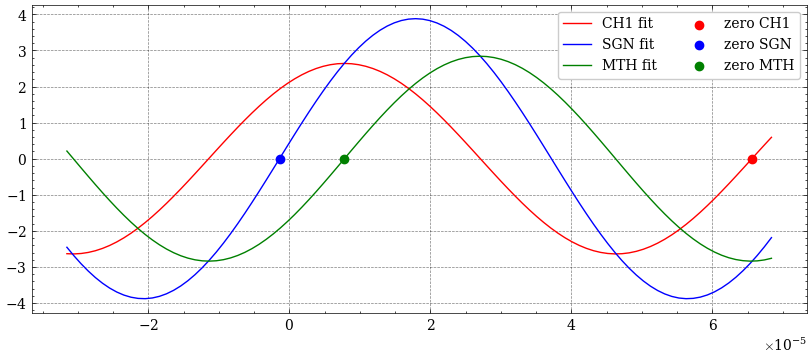

13000 6.699000000000482e-05 9.199999999999932e-06


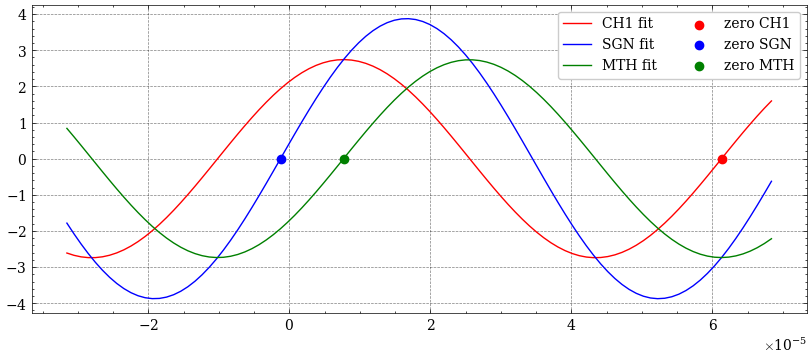

14000 6.255000000000705e-05 8.939999999999935e-06


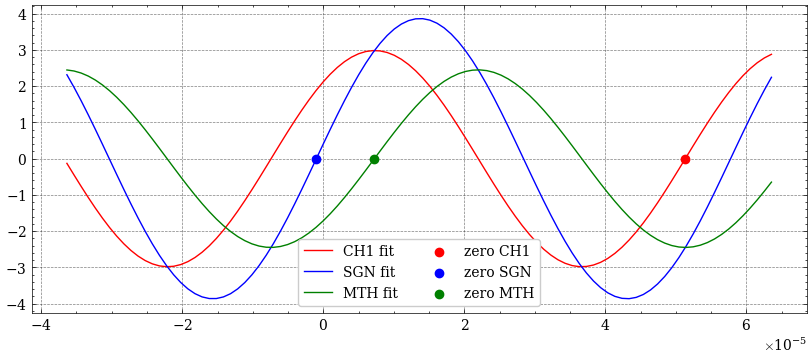

17000 5.233000000000563e-05 8.239999999999941e-06


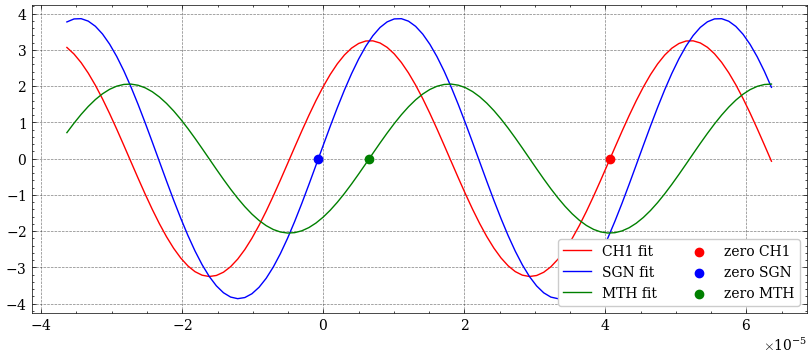

22000 4.137000000000393e-05 7.219999999999949e-06


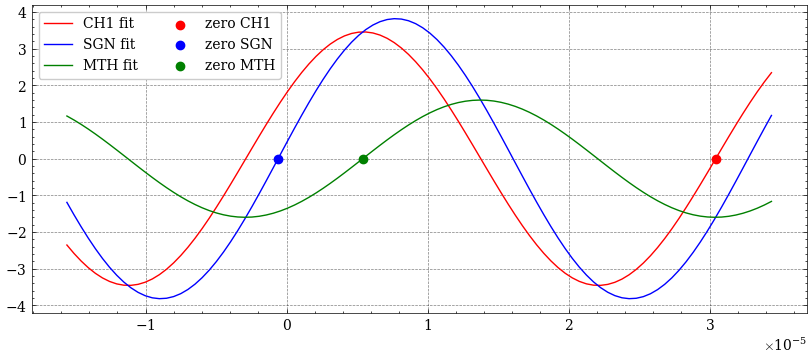

30000 3.103000000000229e-05 5.9999999999999595e-06


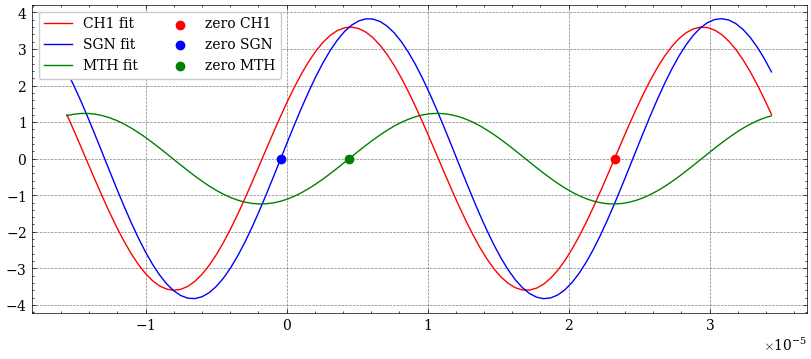

40000 2.3670000000001144e-05 4.849999999999968e-06


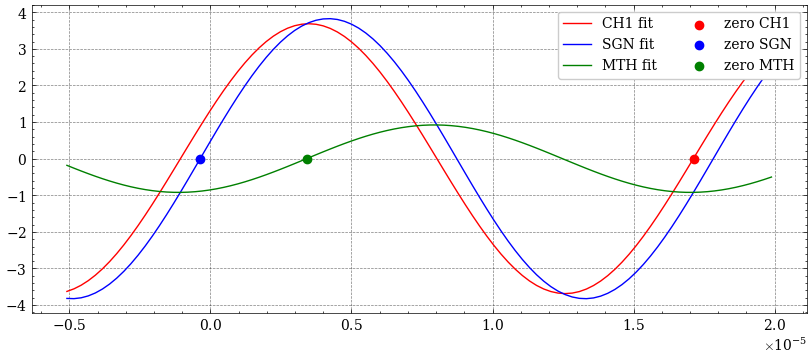

55000 1.7490000000000166e-05 3.7699999999999775e-06


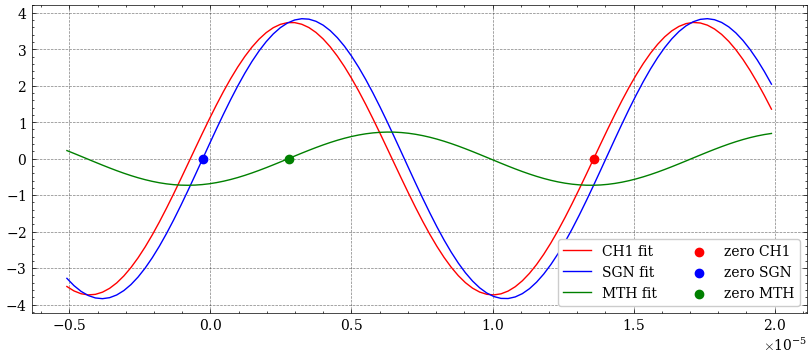

70000 1.3859999999999881e-05 3.0399999999999836e-06


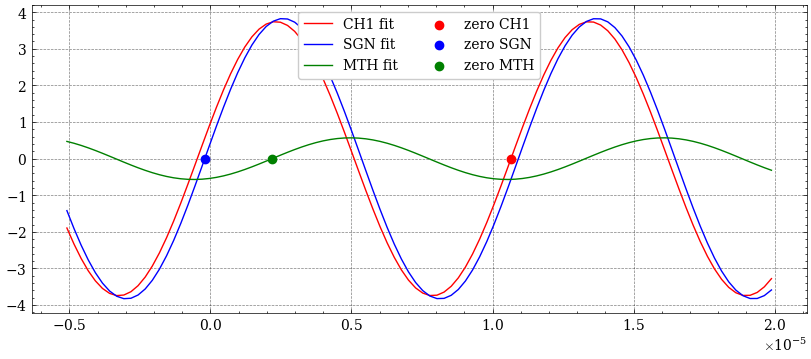

90000 1.0859999999999908e-05 2.389999999999989e-06


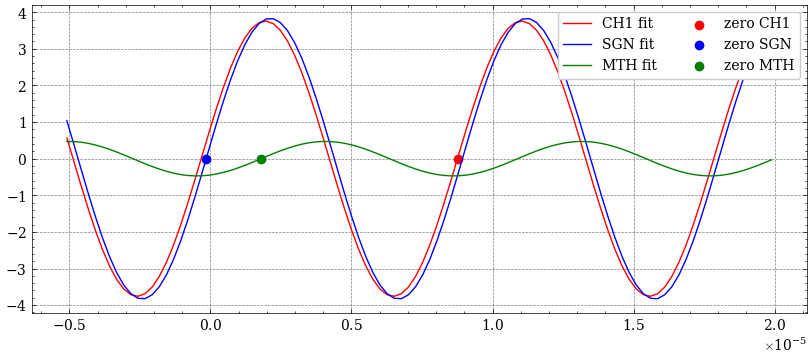

110000 8.909999999999927e-06 1.9499999999999928e-06


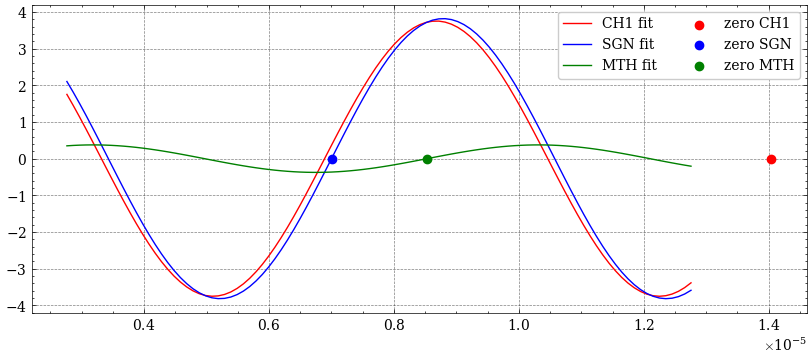

140000 7.0399999999999334e-06 1.5299999999999862e-06


In [29]:
if 1:
    path_folder = 'data.leo/RC/'
    V_res, V_c, fase_res, fase_c = [], [], [], []
    freqs = []
    for i in sorted([int(i) for i in os.listdir(path_folder)]):

        path = path_folder+str(i)+'/'

        # V_SGN, V_MTH, dt_CH1, dt_MTH = analize(path, frequency=i, force=True, verbose=False)
        CH1,SGN,MTH, V_SGN, V_MTH, zero_CH1, zero_SGN, zero_MTH, m1, m2, m3, dt_CH1, dt_MTH = analize(path, i, force=True, prec=1e-8,verbose=True)
        
        x=np.linspace(np.min(CH1[0]), np.max(CH1[0]), 100)

        plt.figure(figsize=(10,4))
        plt.plot(x, sine(x, **m1.values.to_dict()), label='CH1 fit', color='red')
        plt.plot(x, sine(x, **m2.values.to_dict()), label='SGN fit', color='blue')
        plt.plot(x, sine(x, **m3.values.to_dict()), label='MTH fit', color='green')
        
        # plt.plot(CH1[0], CH1[1], label='CH1', color='red')
        # plt.plot(SGN[0], SGN[1], label='SGN', color='blue')
        # plt.plot(MTH[0], MTH[1], label='MTH', color='green')

        plt.scatter(zero_CH1, 0, color='red', label='zero CH1')
        plt.scatter(zero_SGN, 0, color='blue', label='zero SGN')
        plt.scatter(zero_MTH, 0, color='green', label='zero MTH')
        plt.legend(ncol=2)
        plt.show()
        print(i, dt_CH1, dt_MTH)

        V_res.append(V_SGN)
        V_c.append(V_MTH)
        fase_res.append(dt_CH1*i*2*np.pi)
        fase_c.append(dt_MTH*i*2*np.pi)
        freqs.append(i)

    # V_res = np.array(V_res)
    # V_c = np.array(V_c)
    # fase_res = np.array(fase_res)
    # fase_c = np.array(fase_c)
    # freqs = np.array(freqs)

# Modulo

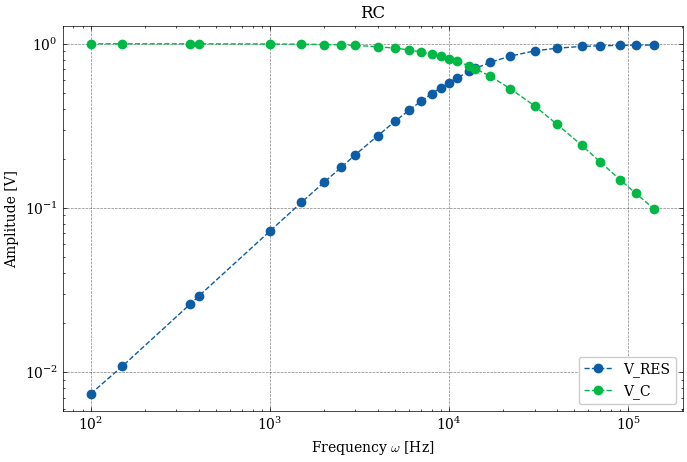

In [30]:
plt.figure(figsize=(8,5))
x = np.linspace(np.min(freqs),np.max(freqs),1000)

# plt.plot(x, H_R(x*2*np.pi, 1e3*12e-9, 0), label='Teorico')
# plt.plot(x, H_C(x*2*np.pi, 1e3*12e-9), label='Teorico')

plt.plot(freqs, V_res, 'o--', label='V_RES')
plt.plot(freqs, V_c, 'o--', label='V_C')
plt.title('RC')
plt.xlabel('Frequency $\omega$ [Hz]')
plt.ylabel('Amplitude [V]')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()

## R

6030.413929404989
{'tau': 9.601884545819692e-07, 'a': 0.0031085362485227443}
0.1239148093995177


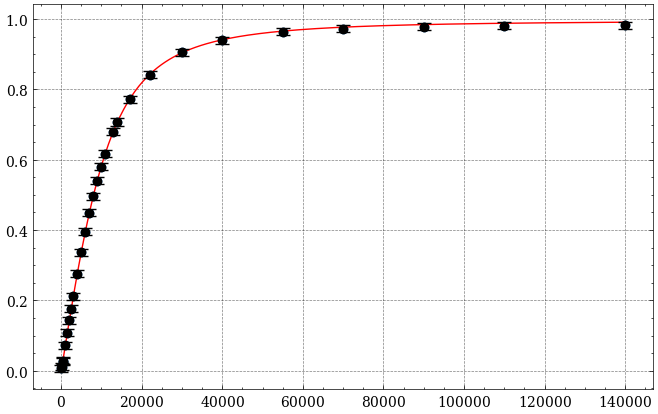

In [31]:
f = Fit(freqs, V_res, H_R, 0.01, kwargs={'tau':1e3*12e-9, 'a':0.})
f.fit()
fig, ax = f.visualize()
fig.set_size_inches(8,5)
print(f.values['tau']/12e-9)
print(f.errors)
print(f.fval/f.ndof)

## C

6008.274883250614
{'tau': 1.0356454179839647e-06, 'a': 0.003002523166740954}
0.02779321714950836


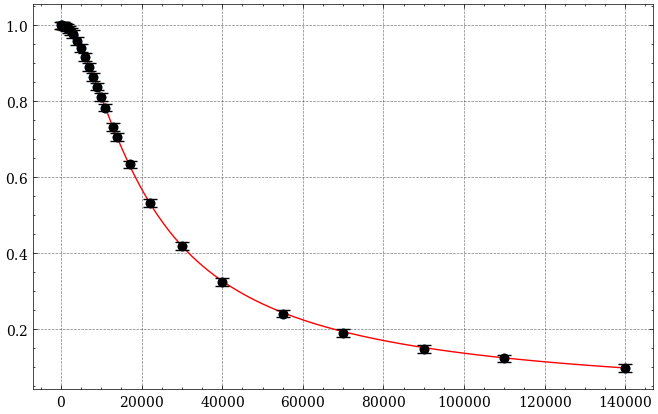

In [32]:
f = Fit(freqs, V_c, H_C, 0.01, kwargs={'tau':1e3*12e-9, 'a':0.})
f.fit()
fig, ax = f.visualize()
fig.set_size_inches(8,5)
print(f.values['tau']/12e-9)
print(f.errors)
print(f.fval/f.ndof)

# Fase

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


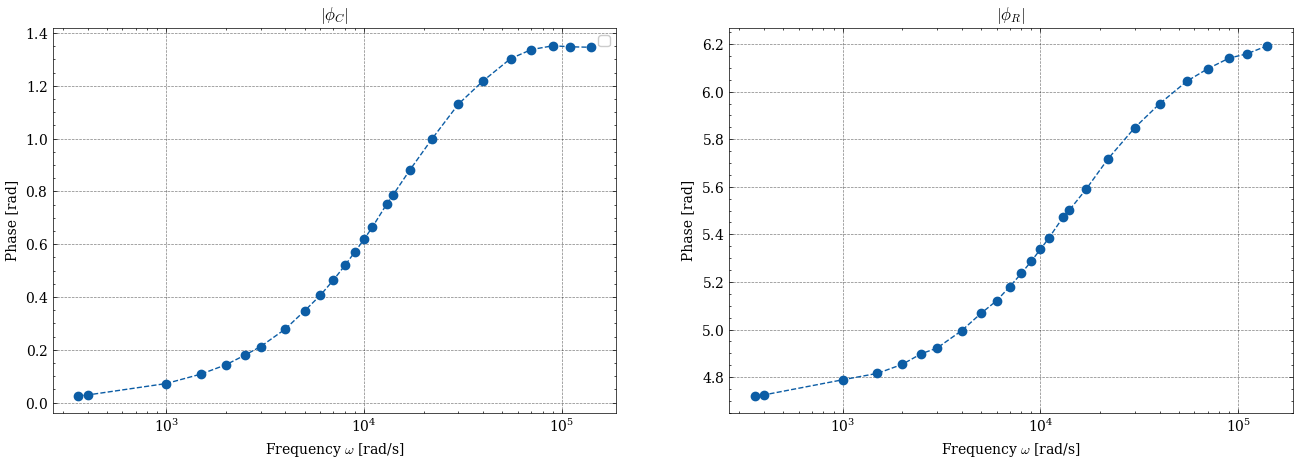

In [33]:
x = np.linspace(np.min(freqs),np.max(freqs),1000)

plt.subplots(1,2,figsize=(16,5))
plt.title('Dati')
plt.subplot(1,2,1)
plt.plot(freqs[2:], fase_c[2:],'o--', lw=1)
plt.title('$|\phi_C|$')
plt.xlabel('Frequency $\omega$ [rad/s]')
plt.ylabel('Phase [rad]')
plt.legend()
plt.xscale('log')

plt.subplot(1,2,2)
plt.plot(freqs[2:], fase_res[2:], 'o--', lw=1)
# plt.plot(x, fase_C(x*2*np.pi, 1e3, 12e-9, 0), label='Teorico')
# plt.plot(x, fase_R(x*2*np.pi, 1e3, 12e-9), label='Teorico')
plt.title('$|\phi_R|$')
plt.xlabel('Frequency $\omega$ [rad/s]')
plt.ylabel('Phase [rad]')
plt.xscale('log')

# plt.savefig('imgs/RC/fasi_no_log.jpeg', bbox_inches='tight', dpi=200)
plt.show()

## R

{'tau': 7.219928759805403e-05, 'a': 3.1375516168192084, 'b': 1.0061805196387492}
{'tau': 4.488621068997795e-08, 'a': 0.00022734717834576, 'b': 0.0002061336742631098}
R =  6.016607299837836
145.42672954328916


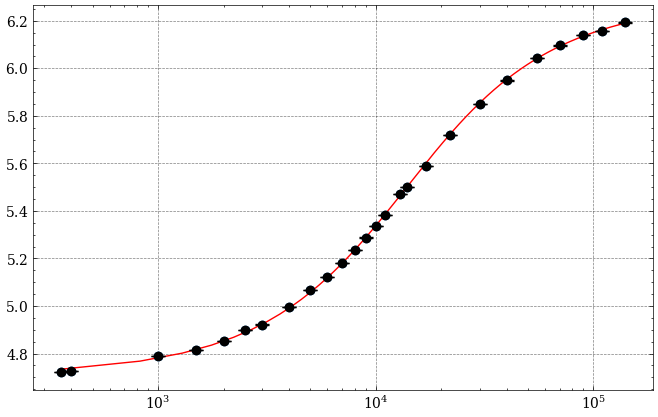

In [34]:
f = Fit(freqs[2:], fase_res[2:], fase_R, 0.0005, kwargs={'tau':12e-3, 'a':-(6), 'b':1})
f.fit()
fig, ax = f.visualize()
fig.set_size_inches(8,5)
print(f.values)
print(f.errors)
print('R = ', f.values['tau']/12e-6)
print(f.fval/f.ndof)
plt.xscale('log')

In [35]:
print(f.values['b']*2*np.pi)

6.32201865736451


## C

{'tau': 7.914818628960169e-05, 'a': -0.007211867891202343, 'b': 0.9492586220094935}
{'tau': 5.128740349290763e-07, 'a': 0.002330806914338635, 'b': 0.0020369473187747166}
10.976448905248608
5.96436782652359


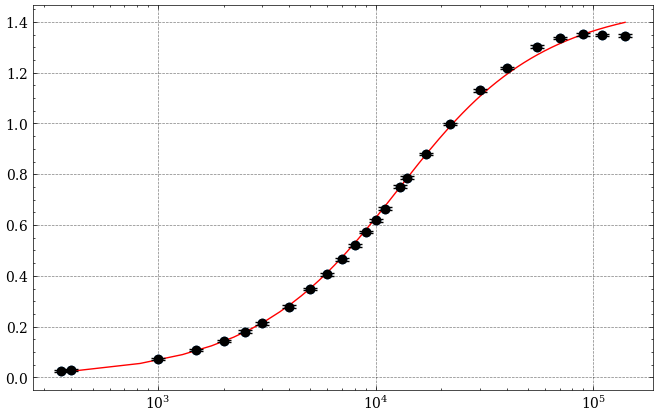

In [36]:
f = Fit(freqs[2:], fase_c[2:], fase_C, 0.005, kwargs={'tau':12e-6, 'a':0, 'b':1})
f.fit()
fig, ax = f.visualize()
fig.set_size_inches(8,5)
print(f.values)
print(f.errors)
print(f.fval/f.ndof)
print(f.values['b']*2*np.pi)
plt.xscale('log')